In [94]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.io.shapereader as shapereader

from pathlib import Path

In [95]:
data_path = Path("C:/JRA55_temp/Frank_SST_ENSO/")

In [96]:
drr = np.genfromtxt(data_path / "ENSO_IOD.csv", delimiter=",", skip_header=1)

stn = drr[:, 0]
lat = drr[:, 1]
lon = drr[:, 2]
rr = drr[:, 3]

In [97]:
lat

array([-1.97, -2.15, -2.32, -2.28, -2.16, -2.17, -2.33, -1.97, -1.7 ,
       -1.63, -1.58, -1.28, -1.43, -1.98, -1.6 , -1.38, -1.48, -1.73,
       -1.8 , -2.34, -2.41, -2.46, -2.69, -1.75, -1.63, -1.68, -1.9 ,
       -2.07, -2.11, -2.08, -1.83, -2.16, -2.36, -2.48, -2.46, -2.78,
       -2.7 , -2.35])

In [98]:
shp_path = data_path / "Rwanda/RWA_adm0.shp"
adm1_shapes = list(shapereader.Reader(str(shp_path)).geometries()) 
#adm1_shapes

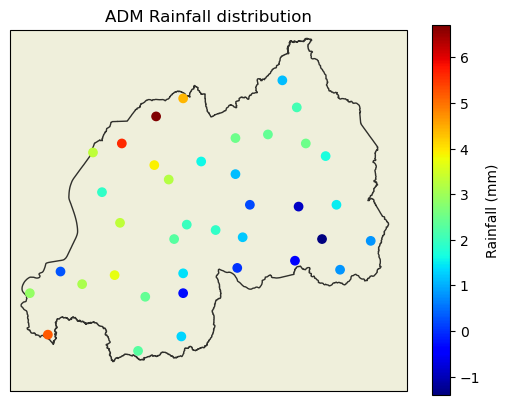

In [128]:
fig = plt.figure()
# create axes with specific proojection
ax = plt.axes(projection=ccrs.PlateCarree())
# set the domain lat lon extent
ax.set_extent([28.8, 31, -3, -1], crs=ccrs.PlateCarree())

# add the administrative borders from the shapefile
ax.add_geometries(adm1_shapes, ccrs.PlateCarree(), edgecolor='black',facecolor='none', alpha=0.8)
# and add country borders, ocean, land and lake borders from cartopy's set of features
#ax.add_feature(cf.BORDERS)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
#ax.add_feature(cf.LAKES, edgecolor='black')

splot = ax.scatter(lon,lat,c=rr, cmap=cm.jet, alpha=1)
ax.set(title='ADM Rainfall distribution')
fig.colorbar(splot,label="Rainfall (mm)", orientation="vertical")

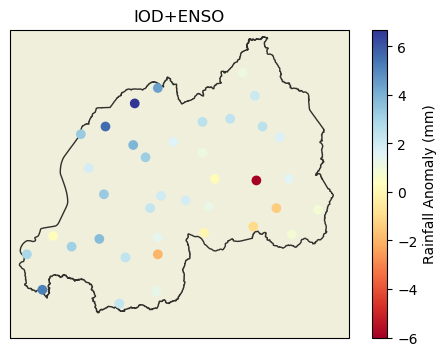

In [133]:
# read data

TA_rr = np.genfromtxt(
    data_path / "ENSO_IOD_PLOT.csv", delimiter=",", skip_header=1
)
latt = TA_rr[:, 0:1]
lont = TA_rr[:, 1:2]
rrt = TA_rr[:, 2:3]

fig = plt.figure(figsize=(6, 4))
# set the cartopy projection
ax = fig.add_subplot(projection=ccrs.PlateCarree())
# set the domain based on the lon lat
ax.set_extent([28.8, 31, -3, -1], ccrs.PlateCarree())

# this add the countries borders and shapefile
ax.add_geometries(
    adm1_shapes, ccrs.PlateCarree(), edgecolor="black", facecolor="none", alpha=0.8
)
#ax.add_feature(cf.BORDERS)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor="black")
#ax.add_feature(cf.LAKES, edgecolor="black")

r = ax.scatter(x=lont, y=latt,c=rrt,  cmap="RdYlBu")
ax.set(title="IOD+ENSO")
plt.colorbar(r, label="Rainfall Anomaly (mm)", orientation="vertical")
plt.savefig("C:/JRA55_temp/Frank_SST_ENSO/EL_NINO+PIOD1.png")
#print(rr)

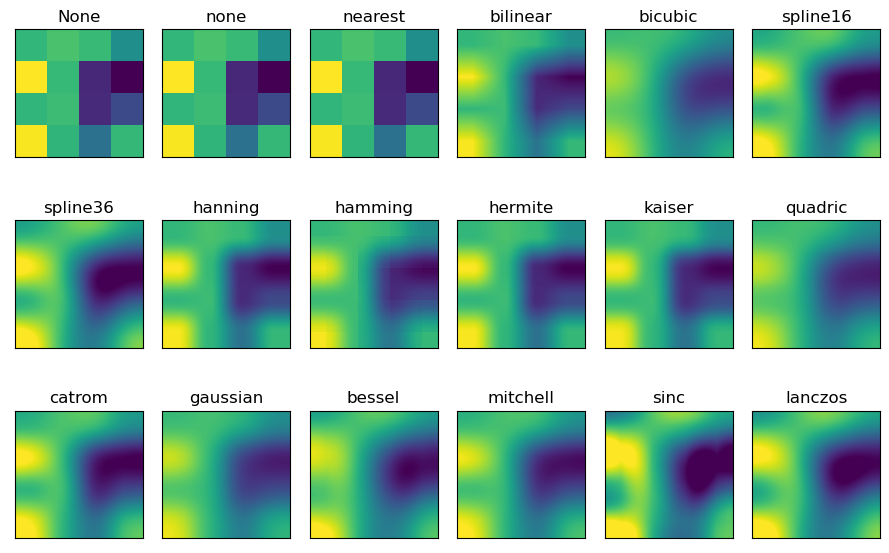

In [112]:
import matplotlib.pyplot as plt
import numpy as np

methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

# Fixing random state for reproducibility
np.random.seed(19680801)

grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()